# Data Collection

In [1]:
! pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle

In [4]:
! kaggle datasets download -d harshpandey062003/dataset

 98% 48.0M/49.0M [00:05<00:00, 16.7MB/s]
100% 49.0M/49.0M [00:06<00:00, 8.00MB/s]


In [5]:
! unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: Datasets/test/Darier_s disease/1.PNG  
  inflating: Datasets/test/Darier_s disease/10.PNG  
  inflating: Datasets/test/Darier_s disease/11.PNG  
  inflating: Datasets/test/Darier_s disease/12.PNG  
  inflating: Datasets/test/Darier_s disease/20.PNG  
  inflating: Datasets/test/Darier_s disease/21.PNG  
  inflating: Datasets/test/Darier_s disease/22.PNG  
  inflating: Datasets/test/Darier_s disease/23.PNG  
  inflating: Datasets/test/Darier_s disease/31.PNG  
  inflating: Datasets/test/Darier_s disease/32.PNG  
  inflating: Datasets/test/Darier_s disease/33.PNG  
  inflating: Datasets/test/Darier_s disease/34.PNG  
  inflating: Datasets/test/Darier_s disease/42.PNG  
  inflating: Datasets/test/Darier_s disease/43.PNG  
  inflating: Datasets/test/Darier_s disease/44.PNG  
  inflating: Datasets/test/Darier_s disease/45.PNG  
  inflating: Datasets/test/Darier_s disease/9.PNG  
  inflating: Datasets/test/Muehrck-e_s lines/1.PNG  
  inflating: Data

# Model Building

## Importing the Model Builing Libraries

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

## Loading the Model

In [7]:
vgg = VGG16(include_top = False, weights='imagenet', input_shape=(224,224,3))

58889256/58889256 [==============================] - 3s 0us/step


## Adding Flatten Layer

In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
x = Flatten()(vgg.output)

## Adding Output Layer

In [10]:
prediction = Dense(17, activation='softmax')(x)

## Creating a Model Object

In [11]:
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Configure the Learning Process

In [13]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'], run_eagerly=True
)

## Import the ImageDataGenerator library

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Configure ImageDataGenerator class

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

## Apply ImageDataGenerator functionality to Trainset and Testset

In [16]:
training_set = train_datagen.flow_from_directory('/content/Datasets/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 655 images belonging to 17 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/Datasets/test',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 183 images belonging to 17 classes.


In [18]:
training_set.class_indices

{'Darier_s disease': 0,
 'Muehrck-e_s lines': 1,
 'aloperia areata': 2,
 'beau_s lines': 3,
 'bluish nail': 4,
 'clubbing': 5,
 'eczema': 6,
 'half and half nailes (Lindsay_s nails)': 7,
 'koilonychia': 8,
 'leukonychia': 9,
 'onycholycis': 10,
 'pale nail': 11,
 'red lunula': 12,
 'splinter hemmorrage': 13,
 'terry_s nail': 14,
 'white nail': 15,
 'yellow nails': 16}

# Training

## Train the Model

In [19]:
import sys
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [20]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 100,
    steps_per_epoch = len(training_set)//3,
    validation_steps = len(test_set)//3,
    callbacks=[reduce_lr])


<ipython-input-20-e7fd765b5177>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
7/7 [==============================] - 28s 848ms/step - loss: 3.9666 - accuracy: 0.0714 - val_loss: 3.8111 - val_accuracy: 0.0625 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 6s 769ms/step - loss: 3.1837 - accuracy: 0.1027 - val_loss: 2.8603 - val_accuracy: 0.1719 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 6s 778ms/step - loss: 2.8482 - accuracy: 0.1875 - val_loss: 2.7375 - val_accuracy: 0.1719 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 7s 846ms/step - loss: 2.3793 - accuracy: 0.2545 - val_loss: 3.2356 - val_accuracy: 0.2188 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 6s 863ms/step - loss: 2.6150 - accuracy: 0.2366 - val_loss: 2.0855 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 6s 773ms/step - loss: 2.3840 - accuracy: 0.2946 - val_loss: 2.3319 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 6s 866ms/step - loss: 2.

*Accuracy of the Model after 100 epochs*

## Save the Model

In [21]:
model.save('vgg-16-nail-disease.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing

## Test the model

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

In [23]:
model = load_model('vgg-16-nail-disease.h5')

### Test 1

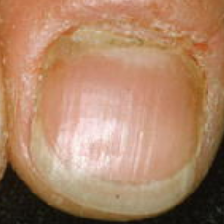

In [24]:
img1 = image.load_img(r'/content/Datasets/test/eczema/22.PNG',target_size=(224,224))
img1

In [25]:
x = image.img_to_array(img1)
x = np.expand_dims(x,axis=0)
x

array([[[[165., 102.,  57.],
         [174., 111.,  67.],
         [178., 115.,  71.],
         ...,
         [154.,  98.,  55.],
         [153., 100.,  56.],
         [154., 101.,  57.]],

        [[168., 106.,  60.],
         [178., 115.,  71.],
         [180., 117.,  73.],
         ...,
         [153.,  97.,  54.],
         [152.,  99.,  55.],
         [153., 100.,  56.]],

        [[171., 109.,  63.],
         [180., 117.,  73.],
         [181., 118.,  74.],
         ...,
         [152.,  96.,  53.],
         [151.,  98.,  54.],
         [152.,  99.,  55.]],

        ...,

        [[ 20.,  17.,  12.],
         [ 25.,  22.,  17.],
         [ 27.,  24.,  19.],
         ...,
         [ 13.,  14.,   8.],
         [ 16.,  17.,  11.],
         [ 23.,  24.,  18.]],

        [[ 20.,  17.,  12.],
         [ 24.,  21.,  16.],
         [ 25.,  22.,  17.],
         ...,
         [ 12.,  13.,   7.],
         [ 15.,  16.,  10.],
         [ 23.,  24.,  18.]],

        [[ 21.,  18.,  13.],
       

In [26]:
model.predict(x)

1/1 [==============================] - 1s 779ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [27]:
output = np.argmax(model.predict(x),axis=1)
index = ['Darier_s disease', 'Muehrck-e_s lines', 'aloperia areata', 'beau_s lines', 'bluish nail', 'clubbing',
         'eczema', 'half and half nailes (Lindsay_s nails)', 'koilonychia', 'leukonychia', 'onycholycis', 'pale nail',
         'red lunula', 'splinter hemmorrage', 'terr_s nail', 'white nail', 'yellow nail']

result = str(index[output[0]])
result

1/1 [==============================] - 0s 33ms/step


'eczema'

### Test 2

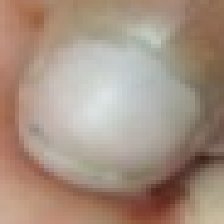

In [28]:
img2 = image.load_img(r'/content/Datasets/test/clubbing/22.PNG',target_size=(224,224))
img2

In [29]:
y = image.img_to_array(img2)
y = np.expand_dims(y,axis=0)

In [30]:
model.predict(y)

1/1 [==============================] - 0s 22ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [31]:
output = np.argmax(model.predict(y),axis=1)
index = ['Darier_s disease', 'Muehrck-e_s lines', 'aloperia areata', 'beau_s lines', 'bluish nail', 'clubbing',
         'eczema', 'half and half nailes (Lindsay_s nails)', 'koilonychia', 'leukonychia', 'onycholycis', 'pale nail',
         'red lunula', 'splinter hemmorrage', 'terr_s nail', 'white nail', 'yellow nail']

result = str(index[output[0]])
result

1/1 [==============================] - 0s 19ms/step


'clubbing'

### Test 3

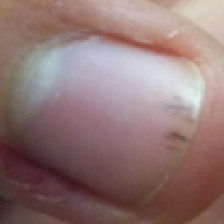

In [32]:
img3 = image.load_img(r'/content/Datasets/test/splinter hemmorrage/r.PNG',target_size=(224,224))
img3

In [33]:
z = image.img_to_array(img3)
z = np.expand_dims(z,axis=0)

In [34]:
model.predict(z)

1/1 [==============================] - 0s 22ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.5786439e-37, 0.0000000e+00,
        4.4943101e-36, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [35]:
output = np.argmax(model.predict(z),axis=1)
index = ['Darier_s disease', 'Muehrck-e_s lines', 'aloperia areata', 'beau_s lines', 'bluish nail', 'clubbing',
         'eczema', 'half and half nailes (Lindsay_s nails)', 'koilonychia', 'leukonychia', 'onycholycis', 'pale nail',
         'red lunula', 'splinter hemmorrage', 'terr_s nail', 'white nail', 'yellow nail']

result = str(index[output[0]])
result

1/1 [==============================] - 0s 20ms/step


'splinter hemmorrage'